#NumPy

## Ejemplo datos scRNAseq
Podemos leer nuestros datos con numpy con genfromtxt o loadtxt

In [ ]:
import numpy as np

count_matrix = np.genfromtxt("files/scrnaseq.csv", dtype="int", delimiter=",") 
cm2 =np.loadtxt("files/scrnaseq.csv", delimiter=",", dtype = "int")

In [5]:
import numpy as np
count_matrix = np.array([ [3, 3, 0],
                          [0, 0, 1],
                          [1, 1, 0],
                          [0, 0, 1],
                          [1, 0, 4],
                          [1, 2, 0]])

In [6]:
### Matriz de coexpresión ###

# cuando sea mayor a 0 será 1, si no será 0
count_matrix = np.where(count_matrix > 0, 1, 0)
count_matrix

array([[1, 1, 0],
       [0, 0, 1],
       [1, 1, 0],
       [0, 0, 1],
       [1, 0, 1],
       [1, 1, 0]])

In [7]:
# Gen 1 vs Gen 1
#producto punto de gen 1 contra gen 1
print(np.dot(count_matrix.T[0], count_matrix.T[0]))

#Resultado similar con operaciones booleanas
print((count_matrix.T[0]) & (count_matrix.T[0]))
print(sum((count_matrix.T[0]) & (count_matrix.T[0])))

4
[1 0 1 0 1 1]
4


In [8]:
#Gen 1 vs Gen 3
#producto punto de gen 1 contra gen 3
print(np.dot(count_matrix.T[0], count_matrix.T[2]))

1


In [9]:
### multiplicación de matríces ###
#Con esta operación podemos crear una matriz de coexpresión

#np.matmul(count_matrix.T, count_matrix)
expresion = np.dot(count_matrix.T, count_matrix)
print(expresion)

#Ignorando la diagonal podemos saber las intersecciones de los datod

[[4 3 1]
 [3 3 0]
 [1 0 3]]


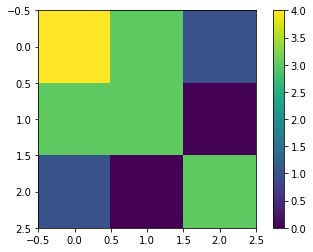

In [10]:
#plot de matriz de coexpresión
import matplotlib.pyplot as plt

plt.imshow(expresion)
plt.colorbar()
plt.show()

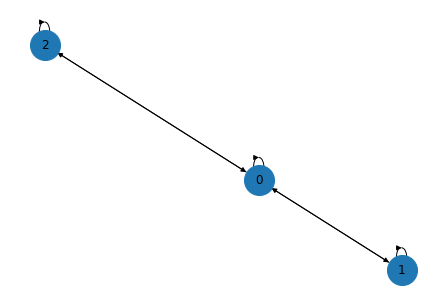

In [11]:
#visualizar en forma de grafos
import networkx as nx
G = nx.DiGraph(expresion)
nx.draw(G, node_size=900, with_labels=True)
plt.show()

## Seeds
¿Si trabajamos con valores aleatorios qué hacer si necesitamos obtener resultados reproducibles?

In [12]:
# Usar un # seed nos permitirá obtener los mismos resultados
import numpy as np
# seed = 10
np.random.seed(10)
print(np.random.rand(1), np.random.rand(1), np.random.rand(1), np.random.rand(1))
# De nuevo seed = 10
np.random.seed(10) 
print(np.random.rand(1))

[0.77132064] [0.02075195] [0.63364823] [0.74880388]
[0.77132064]


## Ejercicio
Análisis estadístico básico de búsqueda de secuencias de interés en un set dado:

Crear función para obtener un set de secuencias de DNA aleatorias

Buscar X patrón en dichas secuencias, obtener información(cantidad de veces encontrada, ¿posición?)

Matriz de coexpresión (¿qué patrones coexisten en cada secuencia? ¿cuáles no?)

In [13]:
#Secuencias aleatorias DNA
#función usando NumPy y sin ciclos for

from Bio.Seq import Seq
import numpy as np

def secuencia_aleatoria(tamano = 100, p = [0.5, 0.5, 0.5, 0.5],seed = None):
    np.random.seed(seed) #posibilidad de reproducibilidad
    DNA = list("ATGC")
    #secuencia random con distribucion p
    secuencia = Seq(''.join(np.random.choice(DNA, tamano, p)))
    return(secuencia)


secuencia = secuencia_aleatoria(25, p=[0.1,0.2,0.4,0.3])
secuencia

Seq('AGTCCACTGGCCCCATAGATAACTC')

In [14]:
#función para escribir archivo de secuencias
def seq_aleatorias(tamano = 100, p = [0.5, 0.5, 0.5, 0.5], seed = None,
                   num_seq = 20, archivo = "SeqAleat.fasta"):
    
    with open(archivo, 'w') as file:
        for i in range(num_seq):
            sec = secuencia_aleatoria(tamano, p, seed)
            file.write(">Seq" + str(i) + "\n")
            file.write(str(sec))
            file.write("\n")
    file.close()

In [15]:
#función para búsqueda de patrones
from Bio import SeqIO, SeqUtils
import csv
import re

def busqueda_patron():
  # TFs a buscar
  tf_interes_mod = { "TF_1": 'ATG[GG|TAG]', "TF_2" : 'T[TC|AA]GAAT', 
                  "TF_3" : "GTATGCGGGG", "TF_4" : "TAT[GT]CC",
                  "TF_5" : "TATATA[GT|TG]" }
  outfile = open("ejercicioNP.csv", "w")
  writer = csv.writer(outfile)
  for rec in SeqIO.parse("SeqAleat.fasta", "fasta"):
      #secuencia por analizar
      seq = rec.seq
      #array para guardar numero de coindicencias
      tf_counts = np.empty((0), dtype = "int")
      for tf in tf_interes_mod.values():
        #findall también sirve para exp. regulares
        counts = len( re.findall(tf, str( seq ) ) )  
        tf_counts = np.append(tf_counts, [counts]) 
    # escribir counts encontrados (iterable)
      writer.writerows( [tf_counts] )
  outfile.close()

In [16]:
### Generar fasta con 10 secuencias distrib. p
seq_aleatorias(p= [0.4, 0.2, 0.3, 0.1])


In [17]:
### Búsqueda de patrónes ###
busqueda_patron()

In [18]:
### Matríz de cuentas ###
count_matrix = np.loadtxt("/content/ejercicioNP.csv", delimiter=",", dtype="int")
print(count_matrix)

[[0 0 0 0 0]
 [0 0 0 0 0]
 [2 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [3 0 0 0 0]
 [1 0 0 1 0]
 [1 0 0 0 0]
 [1 0 0 1 0]
 [0 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 0]
 [1 0 0 0 0]
 [1 1 0 0 0]
 [1 0 0 0 0]
 [4 0 0 0 0]
 [2 0 0 0 0]
 [2 0 0 0 0]]


In [19]:
#Suma de los ejes 
print(np.sum(count_matrix, axis=0))
print(np.sum(count_matrix, axis=1))

[24  1  0  2  0]
[0 0 2 1 1 1 3 2 1 2 0 1 1 0 1 2 1 4 2 2]


In [20]:
#Matríz binaria
matrix_uno = np.where(count_matrix > 0,1,0)
# Matriz de coexpresión: multiplicación de matrices
coexpresion = np.matmul(matrix_uno.T, matrix_uno)
coexpresion

array([[16,  1,  0,  2,  0],
       [ 1,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0],
       [ 2,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0]])

<function matplotlib.pyplot.show>

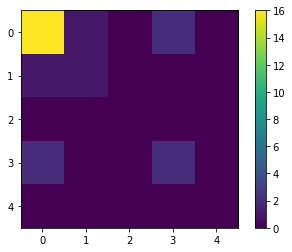

In [21]:
#plot de matriz de coexistencia de TFs
plt.imshow(coexpresion)
plt.colorbar()
plt.show

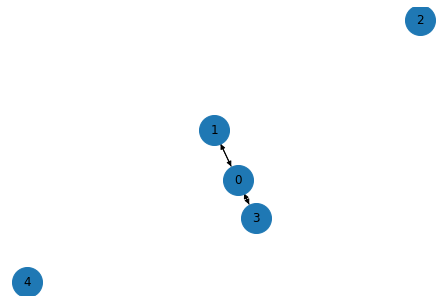

In [22]:
#grafo de matriz coexpresión
G = nx.DiGraph(coexpresion)
nx.draw(G, node_size=900, with_labels=True)
plt.show()

#Pandas
Crear estructuras de datos (basado en NumPy)
* Series (1D)
* DataFrame (2D)
* Panel (3D)

series vs arrays (diferentes)

con series podemos agregar:

* index
* name

In [23]:
import pandas as pd
serie = pd.Series([1,2,3,4,5], 
                  index=['a','b','c','d','e'],
                  name="Ejemplo Serie")
serie

a    1
b    2
c    3
d    4
e    5
Name: Ejemplo Serie, dtype: int64

In [24]:
#Especificar el índice
ecoli_matraz = pd.Series([0.1, 0.15, 0.19, 0.5, 
                         0.9, 1.4, 1.8, 2.1, 2.3],
                         index=['t1', 't2', 't3', 't4',
                                't5', 't6', 't7', 't8', 't9'], 
                         name='Matraz'
                         )
ecoli_matraz

t1    0.10
t2    0.15
t3    0.19
t4    0.50
t5    0.90
t6    1.40
t7    1.80
t8    2.10
t9    2.30
Name: Matraz, dtype: float64

In [25]:
import pandas as pd
ecoli_matraz = pd.Series([0.1, 0.15, 0.19, 0.5],
                         name='Matraz'
                          )
print(ecoli_matraz)

0    0.10
1    0.15
2    0.19
3    0.50
Name: Matraz, dtype: float64


Podemos hacer operaciones como los numpy arrays

También podemos hacer operaciones contra otra serie, la diferencia es que aquí no es por posición, sino por índice.

In [26]:
#Tenemos diferentes longitdes de onda en nuestras ODs.
ODs = pd.Series([0.2, 0.2, 0.4, 0.1, 0.2, 0.1, 0.2, 0.4, 0.1],
                index = [8,4,1,2,3,0,5,7,6],
                name='Ajustes')
ODs

8    0.2
4    0.2
1    0.4
2    0.1
3    0.2
0    0.1
5    0.2
7    0.4
6    0.1
Name: Ajustes, dtype: float64

## Ejercicio 1
Al inducir 5 genes de producción a 30°C se obtuvieron las siguientes producciones del metabolito de interés en g/L:



```
       30°C
Gen1	   5
Gen2	   11
Gen3	   4
Gen4	   7
Gen5	   2
```

Cada gen tiene un inductor diferente y conocemos los costos de todos menos del gen 4:


```
      Costo de inducción
Gen1	    3.5
Gen2    	5
Gen3    	7
Gen5    	4.3
```


In [27]:
import pandas as pd
produccion = pd.Series([5,11,4,7,2],
                       index=['gen1','gen2','gen3','gen4','gen5'])
costos = pd.Series([5,4.3,7,3.5],
                       index=['gen1','gen2','gen4','gen5'])

costo_unitario = costos/produccion.T
#Existen NaN (not a nuber)
costo_unitario 

gen1    1.000000
gen2    0.390909
gen3         NaN
gen4    1.000000
gen5    1.750000
dtype: float64

In [28]:
#También podemos guardar objetos de python
class mamifero(): 
    # Atributos de clase
    vertebrado = True
array_test = pd.Series([0.1, 'a', 0.19, mamifero, 2.1],
                         name='Multiples objetos'
                         )
array_test

0                            0.1
1                              a
2                           0.19
3    <class '__main__.mamifero'>
4                            2.1
Name: Multiples objetos, dtype: object

In [29]:
### Acceder a Series ###
#Similar a NumPy
import numpy as np
ecoli_matraz_pd = pd.Series([0.1, 0.15, 0.19, 0.5,
                         0.9, 1.4, 1.8, 2.1, 2.3])
ecoli_matraz_np = np.array([0.1, 0.15, 0.19, 0.5, 
                         0.9, 1.4, 1.8, 2.1, 2.3])
print(ecoli_matraz_pd[0])
print(ecoli_matraz_np[0])

print(ecoli_matraz_pd[2:5])
print(ecoli_matraz_np[2:5])

0.1
0.1
2    0.19
3    0.50
4    0.90
dtype: float64
[0.19 0.5  0.9 ]


In [30]:
### loc (label) y iloc (index ) ###
series_test = pd.Series([5.1, 2.2, 1.1, 3.1, 4.2],
                         index = [5,2,1,3,4])
series_test

5    5.1
2    2.2
1    1.1
3    3.1
4    4.2
dtype: float64

In [31]:
print(series_test.iloc[1])
print(series_test.loc[1])

2.2
1.1


In [32]:
### slices a partir de nombres de índices ###
#(un regulón es un grupo de genes regulados como una unidad)

regulon = pd.Series(['aidB', 'alaS','bhsA'],
                         index=['AidB', 'AlaS','ComR'],
                         name='Genes regulados' )
regulon

AidB    aidB
AlaS    alaS
ComR    bhsA
Name: Genes regulados, dtype: object

In [33]:
regulon.loc['AlaS':]

AlaS    alaS
ComR    bhsA
Name: Genes regulados, dtype: object

In [34]:
### También podemos acceder con booleanos ###
bool_exp_pd = ecoli_matraz_pd<0.4
ecoli_matraz_pd[bool_exp_pd]

0    0.10
1    0.15
2    0.19
dtype: float64

## Ejercicio 2
Del ejericio anterior, imprime el costo de producción más alto y el más bajo utilizando booleanos.

In [35]:
bol_min = costo_unitario == costo_unitario.min()
bol_max = costo_unitario == costo_unitario.max()

costo_unitario[bol_min | bol_max]

gen2    0.390909
gen5    1.750000
dtype: float64

In [38]:
### Podemos repetir índices ###
regulon = pd.Series(['aidB', 'alaS', 'accB','accC','bhsA'],
                         index=['AidB', 'AlaS', 'AccB', 'AccB','ComR'],
                         name='Genes regulados' )
print(regulon['AccB'], '\n')  #Objeto serie
print(regulon['AidB'])  # Valor único

AccB    accB
AccB    accC
Name: Genes regulados, dtype: object 

aidB


In [39]:
### iterando sobre una serie ###
serie = pd.Series(['a', 'b', 'c', 'd', 'e'])
[letra for letra in serie ]

['a', 'b', 'c', 'd', 'e']

In [41]:
#¿Cómo le preguntamos a una lista si contiene un valor?
#No trabaja sobre valores, trabaja sobre indices
print('a' in serie)
print(0 in serie)

False
True


Pertenencia es sobre el índice, mientras que la iteración es sobre los valores

In [42]:
#¿Cómo lo preguntamos en un objeto Series?
'a' in serie.values

True

In [ ]:
#valores
serie.values
#index
serie.index
#llaves
serie.keys()

In [45]:
### asignación de valores ###
regulon.loc['AidB'] = 'Modificado1'
regulon.loc['AccB'] = 'Modificado2'
regulon

AidB    Modificado1
AlaS           alaS
AccB    Modificado2
AccB    Modificado2
ComR           bhsA
Name: Genes regulados, dtype: object

In [46]:
#También podemos acceder con listas
regulon.iloc[[0,4]] = 'Lista'
regulon

AidB          Lista
AlaS           alaS
AccB    Modificado2
AccB    Modificado2
ComR          Lista
Name: Genes regulados, dtype: object

Si necesitamos que los índices sean numéricos, podemos utilizar reset_index manteniendo o eliminando el índice anterior.

In [47]:
regulon.reset_index()

,index,Genes regulados
0,AidB,Lista
1,AlaS,alaS
2,AccB,Modificado2
3,AccB,Modificado2
4,ComR,Lista


In [48]:
#Podemos obtener frecuencias
regulon.value_counts()

Lista          2
Modificado2    2
alaS           1
Name: Genes regulados, dtype: int64

### Estadística
```
ecoli_matraz.mean()
ecoli_matraz.median()
ecoli_matraz.quantile()
ecoli_matraz.quantile(.25)
ecoli_matraz.describe()
ecoli_matraz.std()
```
También podemos hacer:

* append()
* update()
* repeat()
* sort_values()
* sort_index()